# Семинар 1

## pandas

![](pandas.jpg)

- документация: http://pandas.pydata.org/pandas-docs/stable/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Pandas Tutorial: DataFrames in Python: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- Cheet Sheet: https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/
- Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html

Будем работать с данными, собранными благодаря опросу студентов математического курса средней школы в Португалии (возраст - от 15 до 22 лет). Они находятся в файле "math_students.csv". Целевой переменной является итоговая оценка студента за курс.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# магическая функция, позволяющая выводить графики прямо в ноутбук
%matplotlib inline

Загрузим данные и посмотрим на них.

In [2]:
# если данные и ноутбук находятся в разных папках, то для загрузки файла помимо названия необходимо также прописать путь к нему
# .csv - текстовый файл для представления табличных данных, разделенных каким-то символом. В данном случае - запятой
data = pd.read_csv('math_students.csv', delimiter=',')

# функция .head(n) выводит первые n строк таблицы (по умолчанию n=5)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Аналогично, можно смотреть не на верхние строки таблицы, а на нижние:

In [3]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


В данном случае объектами являются студенты, признаками - различные их характеристики. Найдем число и тех, и других:

In [4]:
data.shape

(395, 33)

Итак, всего объектов 395, а признаков - 32 (учитываем, что один из столбцов - это целевая переменная). Все признаки имеют разную природу. Вот их более подробная расшифровка:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", предпочтение некоторым предметам - "course" или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - количество ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хороши отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - G3 - итоговая оценка (от 0 до 20)

Для вывода названий всех признаков есть специальная функция:

In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Чтобы отделить от признаков целевую переменную, давайте удалим из таблицы последнюю колонку - 'G3'. Как получить таблицу без последней колонки?

In [6]:
data[:, :-1]

TypeError: '(slice(None, None, None), slice(None, -1, None))' is an invalid key

Как видно, индексация как в массивах `numpy` в нашем случае не работает. Давайте рассмотрим список названий колонок, который упоминался выше, без последнего элемента:

In [6]:
data.columns[:-1]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

Теперь "выделим" в таблице те столбцы, которые мы хотим оставить.

In [7]:
data[data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


Заметим, что если бы мы выделили все названия исходных столбцов, то у нас получилась бы и исходная таблица:

In [9]:
data[data.columns].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Как можно еще? Можно оставить элементы таблицы с нужными индексами с помощью функции `iloc`. Все строки мы оставляем на своих местах (`:`), а столбцы берем до минус первого - последнего (`:-1`):

In [10]:
data.iloc[:, :-1].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


Также можно обращаться к строкам-столбцам таблицы не по индексам, а по названиям - с помощью функции `loc`:

In [11]:
data.loc[:, data.columns[:-1]].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


Еще один способ - исключим из таблицы все, что нам нужно, с помощью функции `drop`:

In [12]:
data.drop(['G3'], axis=1).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


Этот способ достаточно удобен, потому что он не зависит от положения колонки "G3" в таблице - неважно, была она последней, первой или третьей с конца.

Обратите внимание на важный параметр `axis`, который указывает на то, на что нужно смотреть - на колонки или столбцы. По умолчанию в данном случае он принимает значение 0 - посмотрим, что получится, если забыть его:

In [13]:
data.drop(['G3'], axis=0).head()

KeyError: "['G3'] not found in axis"

Действительно, никакая из строк таблицы не называется "G3", так что программа не понимает, что мы от нее хотим - исключать нечего.

Посмотрим, есть ли в данных пропуски:

In [16]:
data.isnull().any().any()

False

Давайте разберемся, что сейчас произошло.

In [17]:
data.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [19]:
data.isnull().any().any()

False

Итак, пропусков нет.

По любой функции можно получить информацию из документации следующим образом:

In [ ]:
?pd.isnull()

Либо - нажав Shift+Tab+Tab.

Можно вывести статистику по значениям признаков:

In [20]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Более подробное описание значений признаков (количество непустых значений, типов столбцов и объема занимаемой памяти):

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Какие значения принимает признак `guardian`?

In [22]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [23]:
data['guardian'].nunique()

3

In [24]:
data['guardian'].value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

Выделим только тех студентов, у которых опекуном является мать и которая работает учителем или на дому:

In [25]:
data[(data['guardian'] == 'mother') & ((data['Mjob'] == 'teacher') | (data['Mjob'] == 'at_home'))].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
20,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,4,1,1,1,1,0,13,14,15


Работа с признаками - очень важный этап решения задачи. Помимо имеющихся признаков, можно создавать новые, которые могут оказаться полезными для построения качественного алгоритма. Например, внимательно изучив описания признаков, связанных с алкоголем, создадим признак "alc", который будет отражать общее употребление алкоголя в течение недели по формуле ниже:

$$
alc = \frac{5\times Dalc + 2 \times Walc}{7}
$$

In [26]:
data['alc'] = (5 * data['Dalc'] + 2 * data['Walc']) / 7

In [27]:
data[['Walc', 'Dalc', 'alc']].head()

,Walc,Dalc,alc
0,1,1,1.000000
1,1,1,1.000000
2,3,2,2.285714
3,1,1,1.000000
4,2,1,1.285714


Проанализируем взаимосвязь количества пропусков и успехов в учебе. Посмотрим на распределение количества пропусков у студентов:

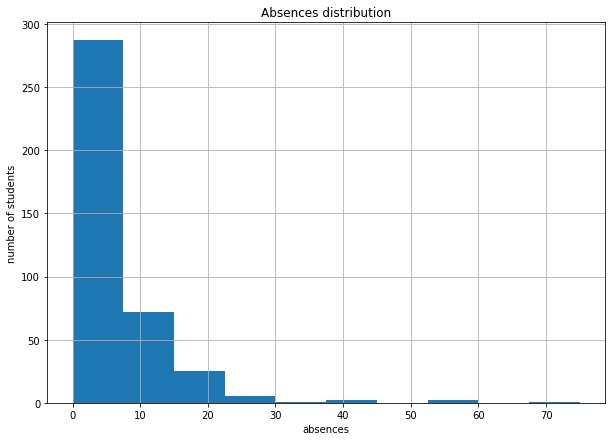

In [28]:
plt.figure(figsize=(10,7))
plt.title('Absences distribution')
data['absences'].hist()
plt.xlabel('absences')
plt.ylabel('number of students')
plt.show()

Посмотрим на среднее количество пропусков:

In [29]:
data['absences'].mean()

5.708860759493671

Итак, из гистограммы и полученного значения можно сделать вывод, что большинство студентов пропускает не так много занятий. Теперь посмотрим на влияние количества пропусков на итоговую оценку. Для этого разделим студентов на две части: те, у кого количество пропусков меньше среднего, и те, у кого оно не меньше среднего.

In [8]:
mean_absences = data['absences'].mean()
stud_few_absences = data[data['absences'] < mean_absences]
stud_many_absences = data[data['absences'] >= mean_absences]

Посмотрим, сколько получилось и тех, и других.

In [9]:
print('Students with few absences:', stud_few_absences.shape[0])
print('Students with many absences:', stud_many_absences.shape[0])

Students with few absences: 249
Students with many absences: 146


Посчитаем среднее значение целевой переменной для каждой части.

In [10]:
stud_few_absences_g3 = stud_few_absences['G3'].mean()
stud_many_absences_g3 = stud_many_absences['G3'].mean()
print('Students with few absences, mean G3:', stud_few_absences_g3)
print('Students with many absences, mean G3:', stud_many_absences_g3)

Students with few absences, mean G3: 10.168674698795181
Students with many absences, mean G3: 10.835616438356164




Итак, средние оценки примерно одинаковы - у тех, кто пропускал меньше занятий, она чуть хуже. Возможно, студенты, пропускавшие много занятий, знали материал очень хорошо :) Впрочем, подобное исследование не позволяет делать никаких серьезных выводов.

Также данные можно исследовать с помощью группировки и агрегирования. Например, найдем исследуем закономерности, связанные с разными школами. Сгруппируем объекты по школам:

In [11]:
data_by_school = data.groupby('school')
data_by_school.describe()

age                                                       Medu  \
        count       mean       std   min    25%   50%   75%   max  count   
school                                                                     
GP      349.0  16.521490  1.216610  15.0  16.00  16.0  17.0  22.0  349.0   
MS       46.0  18.021739  0.881643  17.0  17.25  18.0  18.0  21.0   46.0   

                  ...     G2           G3                                 \
            mean  ...    75%   max  count       mean       std  min  25%   
school            ...                                                      
GP      2.802292  ...  13.00  19.0  349.0  10.489971  4.625397  0.0  8.0   
MS      2.347826  ...  12.75  18.0   46.0   9.847826  4.237229  0.0  8.0   

                           
         50%    75%   max  
school                     
GP      11.0  14.00  20.0  
MS      10.0  12.75  19.0  

[2 rows x 128 columns]

Теперь посмотрим на среднее значение признаков для каждой школы:

In [12]:
data_by_school.mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,
GP,16.521490,2.802292,2.553009,1.386819,2.063037,0.318052,3.959885,3.223496,3.111748,1.444126,2.260745,3.575931,5.965616,10.939828,10.782235,10.489971
MS,18.021739,2.347826,2.282609,1.913043,1.826087,0.456522,3.826087,3.326087,3.086957,1.760870,2.521739,3.391304,3.760870,10.673913,10.195652,9.847826


Можно заметить, например, что в среднем до школы Mousinho da Silveira студентам нужно добираться дольше, чем до Gabriel Pereira. Интересно, что, несмотря на это, в среднем количество пропусков у них меньше.

### Задания для самостоятельного решения

1. Получите таблицу со студентами с четными номерами.
2. Получите таблицу со студентами, имеющими четное число пропусков.
3. Верно ли, что студенты, имеющие больше 10 пропусков, учатся хуже, чем остальные?
4. Как вы думаете, какие еще признаки могут повлиять на итоговую оценку? Найдите закономерности, аналогичные рассмотренным.
5. Как вы думаете, если при школе откроется общежитие, насколько актуально это будет для студентов математического класса?
6. Найдите в данных закономерности с помощью группировки.

In [14]:
# 1
data.iloc[::2]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,7,6,5,6
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7


In [17]:
# 2
data[data['absences'] % 2 == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,2,10,9,10
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0


In [21]:
# 3
abs_more_10 = data[data['absences'] > 10]['G3'].mean()
abs_lower_10 = data[data['absences'] <= 10]['G3'].mean()
print(f'Students with more than 10 absences: {abs_more_10}')
print(f'Students with lower than 10 absences: {abs_lower_10}')

Students with more than 10 absences: 10.151515151515152
Students with lower than 10 absences: 10.46808510638298


In [24]:
# 4
# Студенты из городов учатся в среднем лучше
urb = data[data['address'] == 'U']['G3'].mean()
rur = data[data['address'] == 'R']['G3'].mean()
print(f'Students from rural area: {rur}')
print(f'Students from cities: {urb}')

Students from rural area: 9.511363636363637
Students from cities: 10.674267100977199


In [26]:
# Студенты из больших семей в среднем учатся хуже
big_fam = data[data['famsize'] == 'GT3']['G3'].mean()
small_fam = data[data['famsize'] == 'LE3']['G3'].mean()
print(f'Students from big families: {big_fam}')
print(f'Students from small families: {small_fam}')

Students from big families: 10.177935943060499
Students from small families: 11.0


In [31]:
# Студенты, у которых есть Интернет, учатся в среднем лучше
internet = data[data['internet'] == 'yes']['G3'].mean()
no_internet = data[data['internet'] == 'no']['G3'].mean()
print(f'Students with internet: {internet}')
print(f'Students without internet: {no_internet}')

Students with internet: 10.617021276595745
Students without internet: 9.409090909090908


In [84]:
# 5
data.pivot_table(['G3'], ['school', 'traveltime'], aggfunc='mean')

G3
school traveltime           
GP     1           10.868313
       2            9.702381
       3            9.666667
       4            8.571429
MS     1            9.285714
       2           10.652174
       3            8.500000
       4           10.000000

In [82]:
data[data['school'] == 'GP']['traveltime'].value_counts(normalize=True)

1    0.696275
2    0.240688
3    0.042980
4    0.020057
Name: traveltime, dtype: float64

В школе GP наблюдается корреляция между оценками студентов и количеством времени, которое студенты тратят на дорогу до школы: чем меньше время, потраченное на дорогу, тем лучше оценки. В школе MS такая тенденция не прослеживается, что, возможно, связано с малым количеством наблюдений, взятых для школы MS. Возможно, общежитие смогло бы улучшить успеваемость студентов. Однако здесь стоит заметить, что не так много студентов тратят больше 30 минут на дорогу до школы - около 6% от учащихся в школе GP. Соотвественно, можно предложить, что спрос на общежитие будет небольшим.

In [85]:
# 6
data.groupby('studytime')['G3'].mean()

studytime
1    10.047619
2    10.171717
3    11.400000
4    11.259259
Name: G3, dtype: float64

In [91]:
data.groupby('higher')['G3'].mean()

higher
no      6.800
yes    10.608
Name: G3, dtype: float64

In [95]:
data.groupby('romantic')['G3'].mean()

romantic
no     10.836502
yes     9.575758
Name: G3, dtype: float64

In [98]:
data.groupby('Fedu')['G3'].value_counts()

Fedu  G3
0     10     1
      16     1
1     10    16
      0     11
      8      8
            ..
4     18     4
      6      3
      5      2
      7      2
      19     2
Name: G3, Length: 64, dtype: int64